In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
descriptor_cols=['INST_COD_INSTITUCION', 'INST_NOMBRE_INSTITUCION',
       'ESTU_PRGM_ACADEMICO', 'ESTU_SNIES_PRGMACADEMICO',
       'ESTU_PRGM_CODMUNICIPIO', 'ESTU_PRGM_MUNICIPIO',
       'ESTU_PRGM_DEPARTAMENTO', 'ESTU_NIVEL_PRGM_ACADEMICO',
       'ESTU_METODO_PRGM', 'ESTU_NUCLEO_PREGRADO', 'ESTU_INST_CODMUNICIPIO',
       'ESTU_INST_MUNICIPIO', 'ESTU_INST_DEPARTAMENTO',
       'INST_CARACTER_ACADEMICO', 'INST_ORIGEN', 'ESTU_COD_MCPIO_PRESENTACION',
       'ESTU_MCPIO_PRESENTACION', 'ESTU_DEPTO_PRESENTACION',
       'ESTU_COD_DEPTO_PRESENTACION']
target_cols=['MOD_RAZONA_CUANTITAT_PUNT',
       'MOD_RAZONA_CUANTITATIVO_PNAL', 'MOD_LECTURA_CRITICA_PUNT',
       'MOD_LECTURA_CRITICA_PNAL', 'MOD_COMPETEN_CIUDADA_PUNT',
       'MOD_COMPETEN_CIUDADA_PNAL', 'MOD_INGLES_PUNT', 'MOD_INGLES_DESEM',
       'MOD_INGLES_PNAL', 'MOD_COMUNI_ESCRITA_PUNT',
       'MOD_COMUNI_ESCRITA_DESEM', 'MOD_COMUNI_ESCRITA_PNAL']
others_cols=['ESTU_ESTADOINVESTIGACION', 'PERIODO-X', 'PRUEBA']
columns=others_cols+descriptor_cols+target_cols

In [3]:
df_full = pd.read_csv('data-final.csv', encoding = "UTF-8")
df=df_full.copy() #df_full[columns].copy()
df.head()

/home/alpha/anaconda3/envs/case_1.1_var2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9,11,12,30,33,34,40,45,48,58,59,60) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,MOD_COMPETEN_CIUDADA_PNAL,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA
0,0,CC,1 COLOMBIA,F,24/11/1994,20163,EK201630197609,ESTUDIANTE,CUNDINAMARCA,25,...,78.0,155.0,A2,62.0,151,3,43,PUBLICAR,2016,SaberPro
1,1,CC,1 COLOMBIA,M,11/06/1991,20163,EK201630241417,ESTUDIANTE,BOGOTA,11,...,88.0,153.0,A2,59.0,220,4,100,PUBLICAR,2016,SaberPro
2,2,CC,1 COLOMBIA,F,22/02/1995,20163,EK201630080363,ESTUDIANTE,NORTE SANTANDER,54,...,25.0,120.0,-A1,16.0,162,3,72,PUBLICAR,2016,SaberPro
3,3,CC,1 COLOMBIA,M,01/08/1994,20163,EK201630081694,ESTUDIANTE,BOGOTA,11,...,82.0,214.0,B2,98.0,112,1,8,PUBLICAR,2016,SaberPro
4,4,CC,1 COLOMBIA,M,18/08/1980,20163,EK201630079620,ESTUDIANTE,BOLIVAR,13,...,77.0,184.0,B1,84.0,158,3,53,PUBLICAR,2016,SaberPro


In [4]:
target=[x for x in target_cols if '_PUNT' in x]
target
df[target] = df[target].apply(pd.to_numeric, errors='coerce')

In [5]:
#replace Bogotá for Bogota
df['ESTU_INST_DEPARTAMENTO']=df.ESTU_INST_DEPARTAMENTO.replace('BOGOTÁ', 'BOGOTA')

In [6]:
punt_cols = [x for x in target_cols if '_PUNT' in x]
data = df[punt_cols]
data = pd.DataFrame(data.stack())

In [7]:
data.reset_index(inplace=True)
data.columns=['0','test','score']
data.drop(['0'], axis=1, inplace=True)
data['test']=data.test.astype('category')
data['score']=pd.to_numeric(data.score.values, errors='coerce')
data.test.cat.categories=[x.replace('MOD_','').replace('_PUNT','') for x in data.test.unique()]

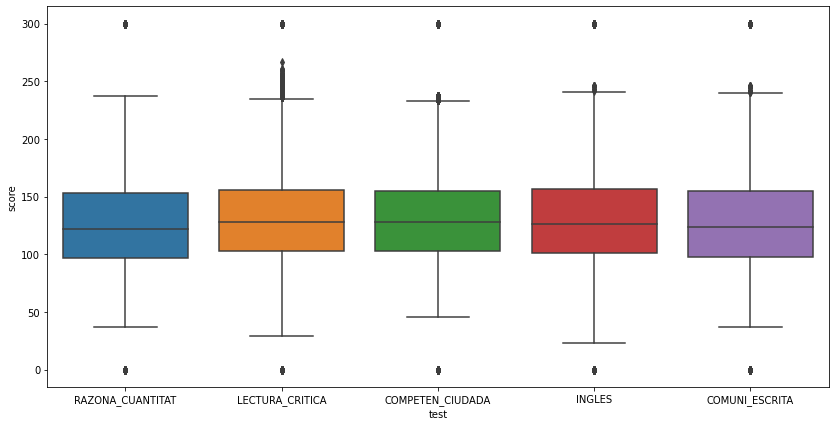

In [8]:
fig=plt.figure(figsize=(14,7))
sns.boxplot(data=data, x='test', y='score')
plt.show()

In [9]:
data = df[punt_cols]
data.columns = [x.replace('MOD_','').replace('_PUNT','') for x in data.columns]

In [10]:
data.head()

,RAZONA_CUANTITAT,LECTURA_CRITICA,COMPETEN_CIUDADA,INGLES,COMUNI_ESCRITA
0,158.0,170.0,175.0,155.0,151.0
1,178.0,179.0,185.0,153.0,220.0
2,160.0,156.0,129.0,120.0,162.0
3,191.0,168.0,178.0,214.0,112.0
4,152.0,163.0,173.0,184.0,158.0


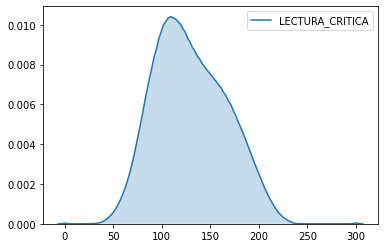

In [11]:
sns.kdeplot(data.LECTURA_CRITICA, shade=True)


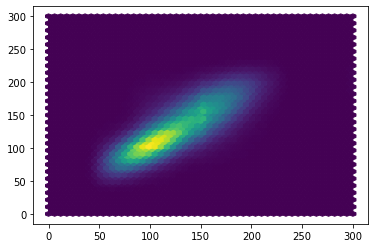

In [12]:
plt.hexbin(x=data.RAZONA_CUANTITAT, y=data.LECTURA_CRITICA, gridsize=50, vmin=10)
#sns.jointplot(x="RAZONA_CUANTITAT", y="LECTURA_CRITICA", data=data, kind="hex", ratio=10, height=5);

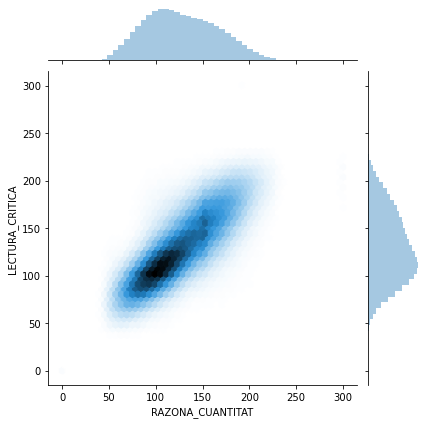

In [13]:
sns.jointplot(x="RAZONA_CUANTITAT", y="LECTURA_CRITICA", data=data, kind="hex");

In [14]:
sin_cod=df.columns[~df.columns.str.contains('_COD_')]
df[sin_cod].head()

,Unnamed: 0,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,...,MOD_COMPETEN_CIUDADA_PNAL,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA
0,0,CC,1 COLOMBIA,F,24/11/1994,20163,EK201630197609,ESTUDIANTE,CUNDINAMARCA,TABIO,...,78.0,155.0,A2,62.0,151.0,3,43,PUBLICAR,2016,SaberPro
1,1,CC,1 COLOMBIA,M,11/06/1991,20163,EK201630241417,ESTUDIANTE,BOGOTA,BOGOTÁ D.C.,...,88.0,153.0,A2,59.0,220.0,4,100,PUBLICAR,2016,SaberPro
2,2,CC,1 COLOMBIA,F,22/02/1995,20163,EK201630080363,ESTUDIANTE,NORTE SANTANDER,CUCUTA,...,25.0,120.0,-A1,16.0,162.0,3,72,PUBLICAR,2016,SaberPro
3,3,CC,1 COLOMBIA,M,01/08/1994,20163,EK201630081694,ESTUDIANTE,BOGOTA,BOGOTÁ D.C.,...,82.0,214.0,B2,98.0,112.0,1,8,PUBLICAR,2016,SaberPro
4,4,CC,1 COLOMBIA,M,18/08/1980,20163,EK201630079620,ESTUDIANTE,BOLIVAR,CARTAGENA,...,77.0,184.0,B1,84.0,158.0,3,53,PUBLICAR,2016,SaberPro


In [15]:
df[sin_cod].columns

Index(['Unnamed: 0', 'ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE',
       'ESTU_COLE_TERMINO', 'ESTU_VALORMATRICULAUNIVERSIDAD',
       'ESTU_PAGOMATRICULABECA', 'ESTU_PAGOMATRICULACREDITO',
       'ESTU_PAGOMATRICULAPADRES', 'ESTU_PAGOMATRICULAPROPIO',
       'ESTU_SIMULACROTIPOICFES', 'ESTU_ACTIVIDADREFUERZOAREAS',
       'ESTU_ACTIVIDADREFUERZOGENERIC', 'ESTU_TIPODOCUMENTOSB11',
       'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_ESTRATOVIVIENDA',
       'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA',
       'FAMI_TIENEAUTOMOVIL', 'ESTU_HORASSEMANATRABAJA',
       'INST_NOMBRE_INSTITUCION', 'ESTU_PRGM_ACADEMICO',
       'ESTU_SNIES_PRGMACADEMICO', 'ESTU_PRGM_CODMUNICIPIO',
       'ESTU_PRGM_MUNICIPIO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_NIVEL_PRGM_ACADEMICO', 'ESTU_METODO_PRGM', 'ESTU_NUCLEO_PREGRADO',
       'ES

In [16]:
target=[x for x in target_cols if '_PUNT' in x]
target

['MOD_RAZONA_CUANTITAT_PUNT',
 'MOD_LECTURA_CRITICA_PUNT',
 'MOD_COMPETEN_CIUDADA_PUNT',
 'MOD_INGLES_PUNT',
 'MOD_COMUNI_ESCRITA_PUNT']

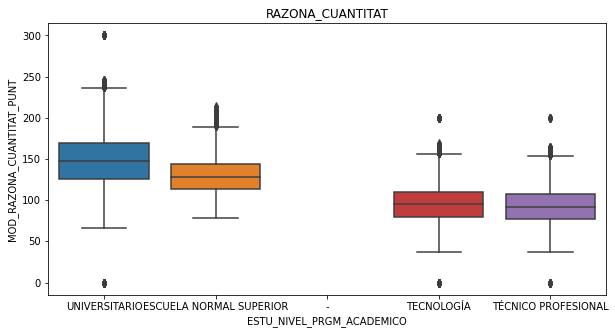

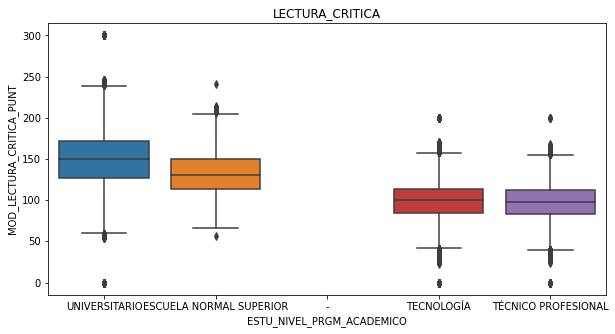

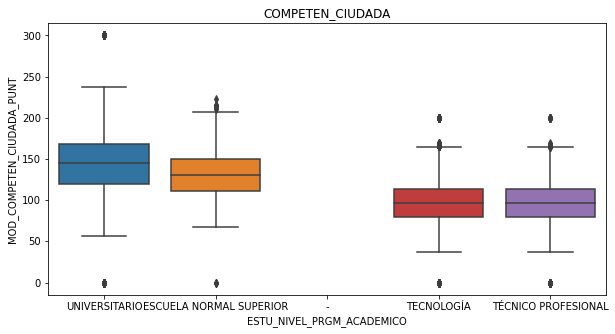

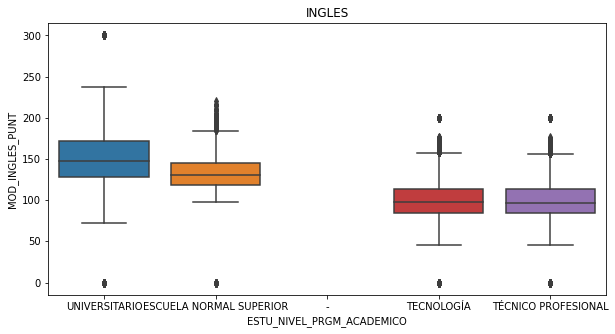

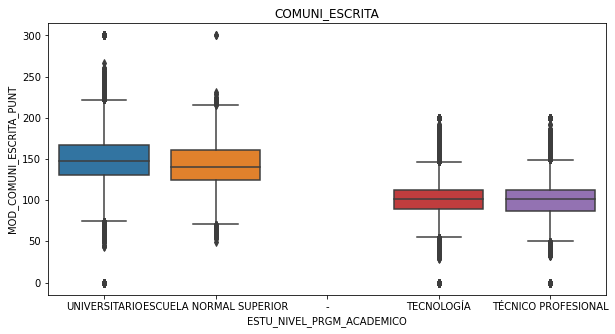

In [17]:
data = df[sin_cod].copy()

for test in target:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='ESTU_NIVEL_PRGM_ACADEMICO', y=test, data=data)
    plt.title(test.replace('MOD_','').replace('_PUNT',''))
    plt.show()

In [18]:
data = df[sin_cod].copy()

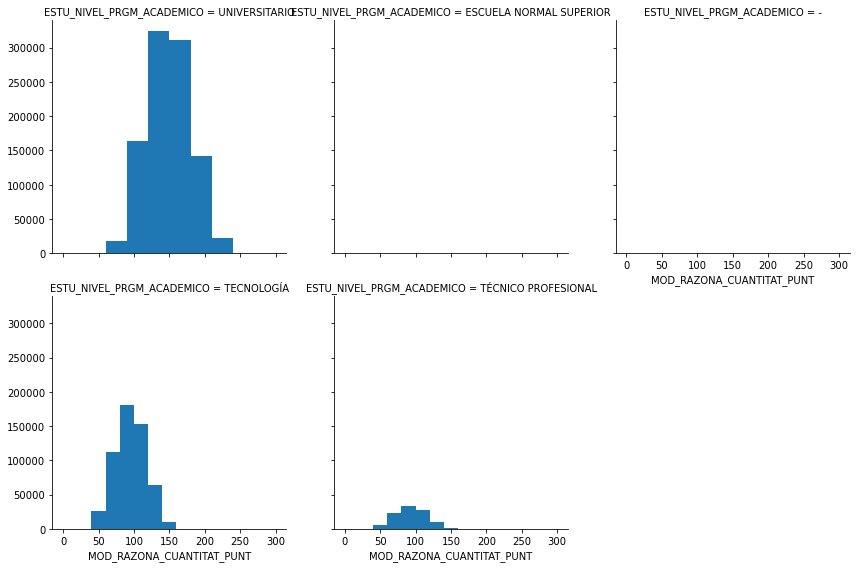

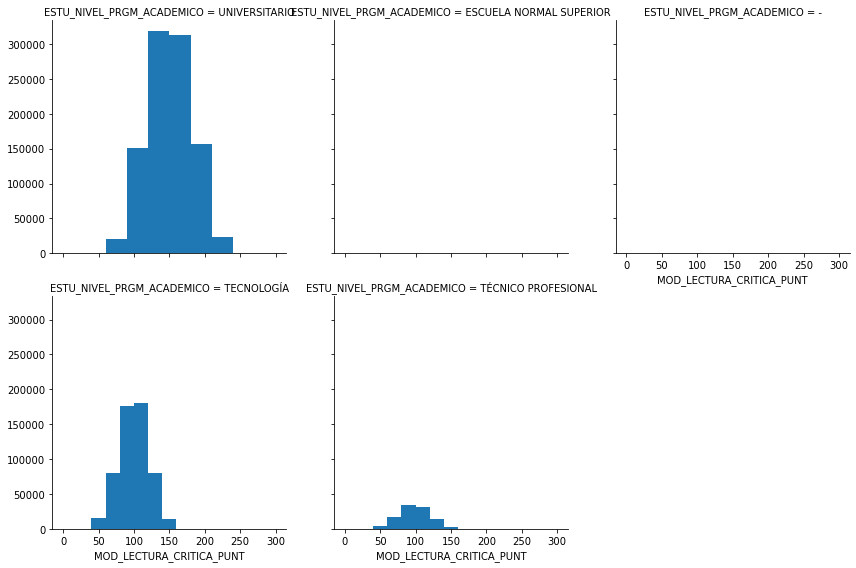

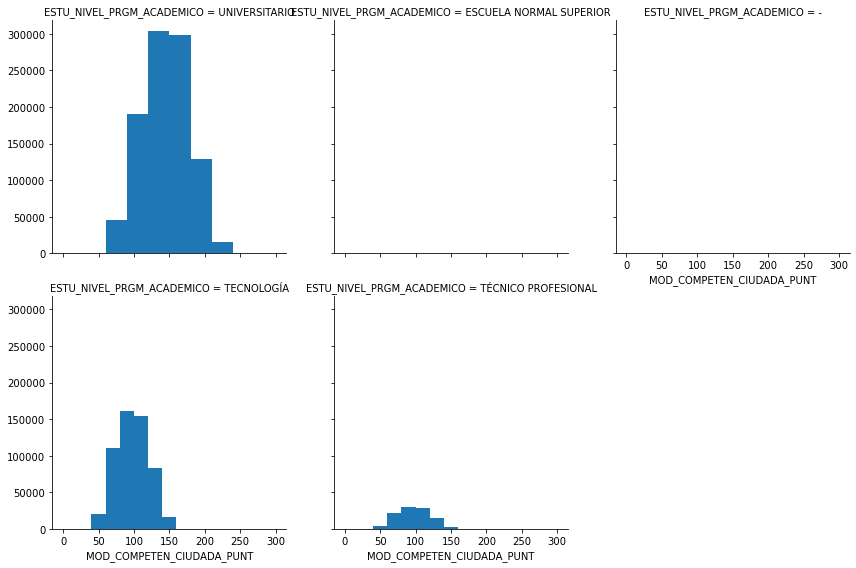

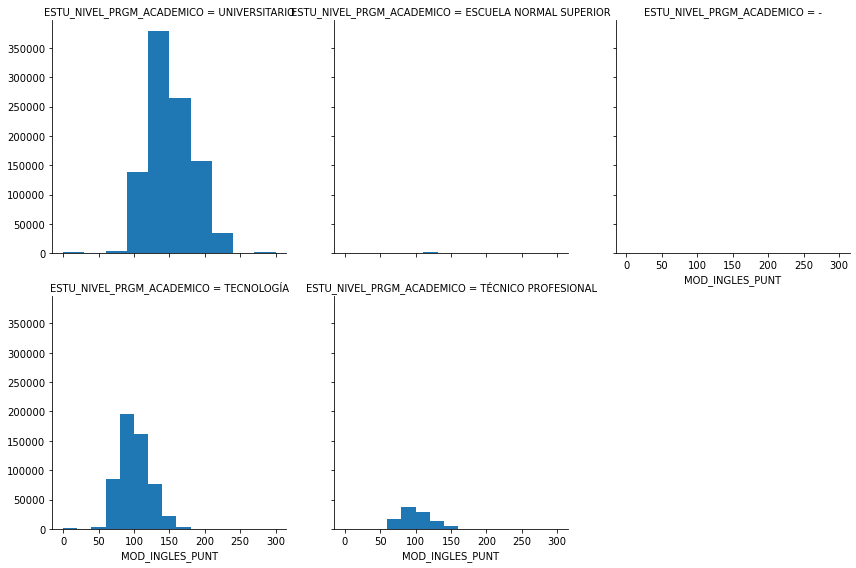

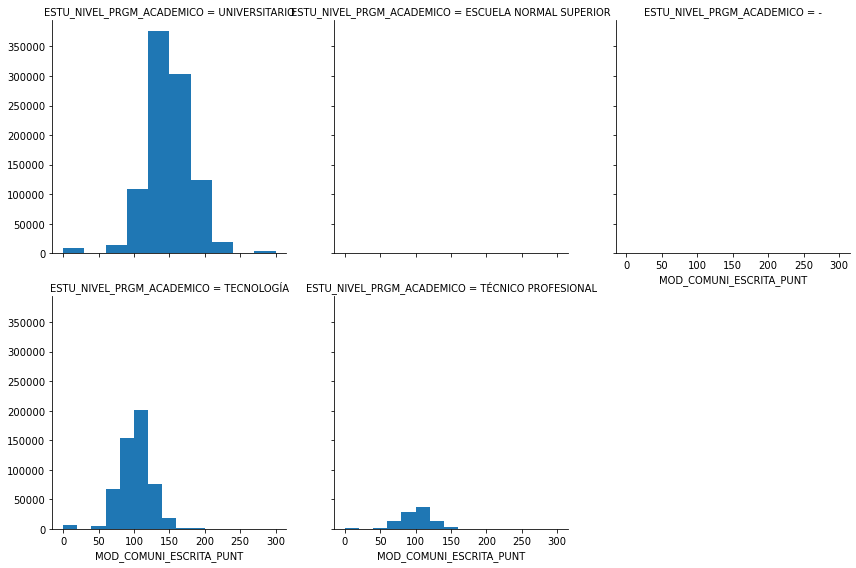

In [19]:
for result in target:
    g=sns.FacetGrid(data, col='ESTU_NIVEL_PRGM_ACADEMICO', aspect=1, height=4, col_wrap=3)
    g = g.map(plt.hist, result)
    plt.show()

In [20]:
order=np.sort(data.ESTU_INST_DEPARTAMENTO.unique())
order

array(['-', 'AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLANTICO', 'BOGOTA',
       'BOLIVAR', 'BOYACA', 'CALDAS', 'CAQUETA', 'CASANARE', 'CAUCA',
       'CESAR', 'CHOCO', 'CORDOBA', 'CUNDINAMARCA', 'HUILA', 'LA GUAJIRA',
       'MAGDALENA', 'META', 'NARIÑO', 'NORTE SANTANDER', 'PUTUMAYO',
       'QUINDIO', 'RISARALDA', 'SAN ANDRES', 'SANTANDER', 'SUCRE',
       'TOLIMA', 'VALLE', 'VICHADA'], dtype=object)

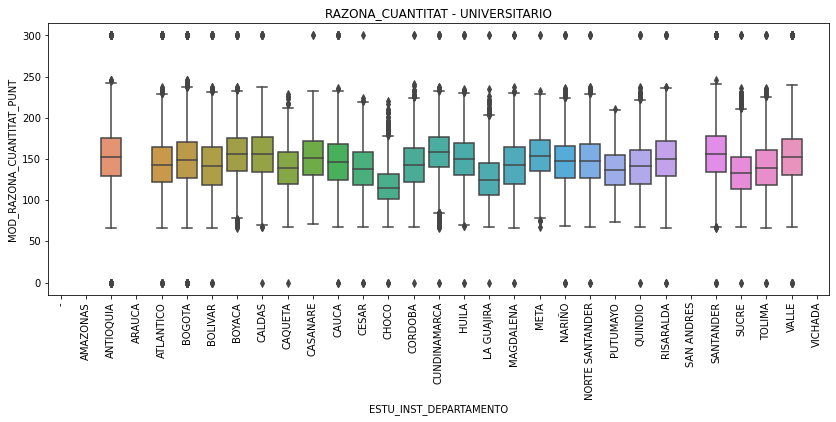

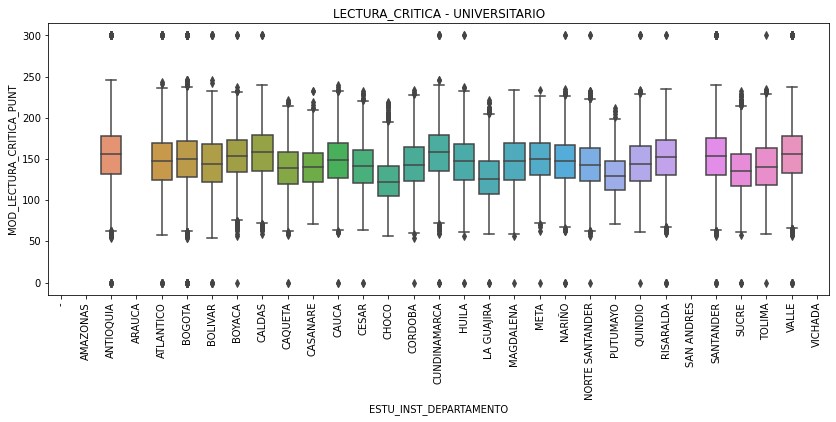

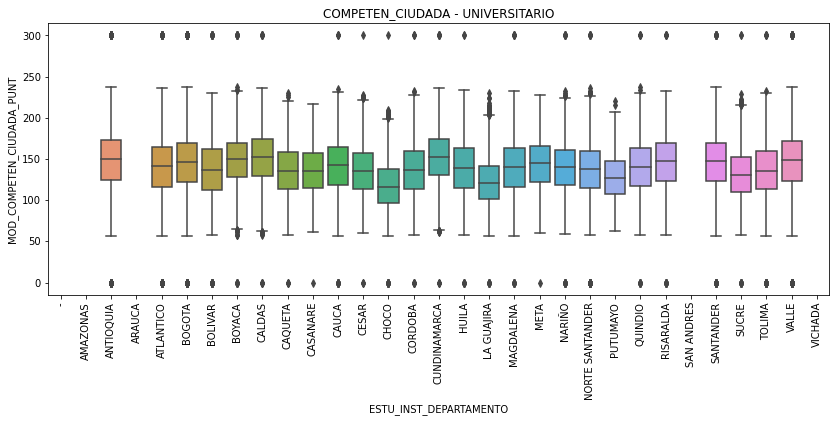

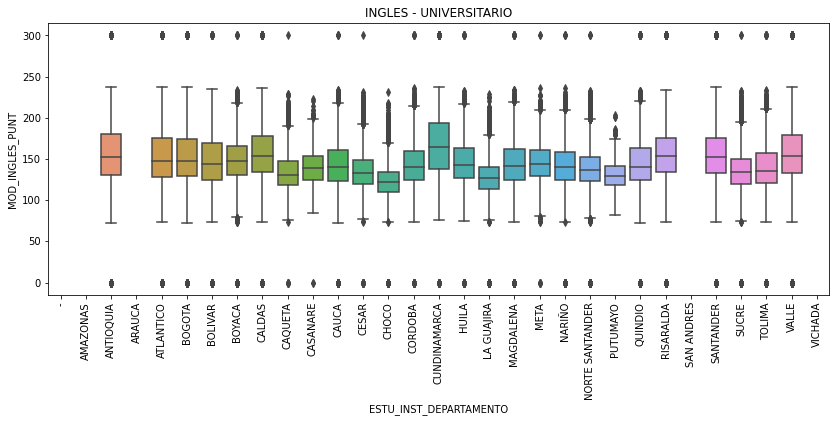

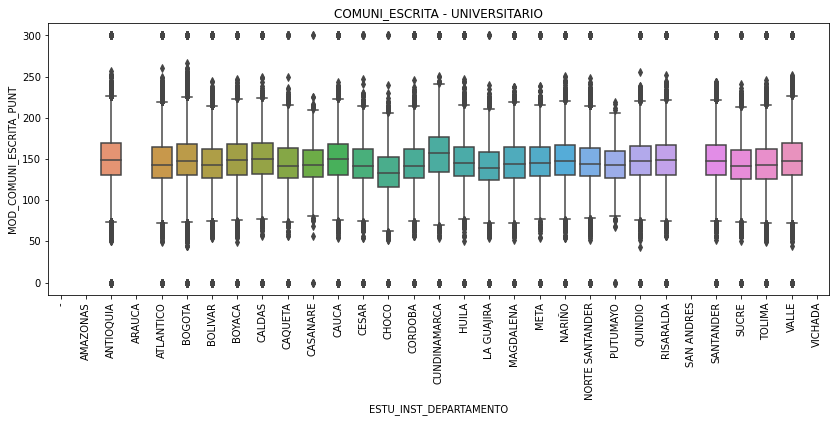

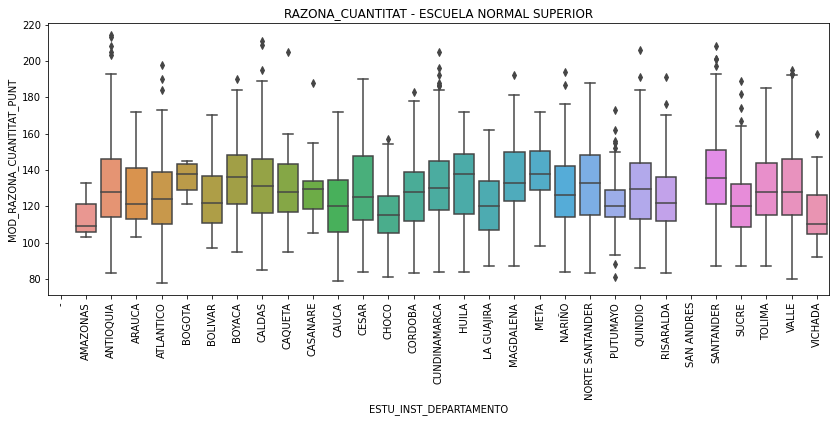

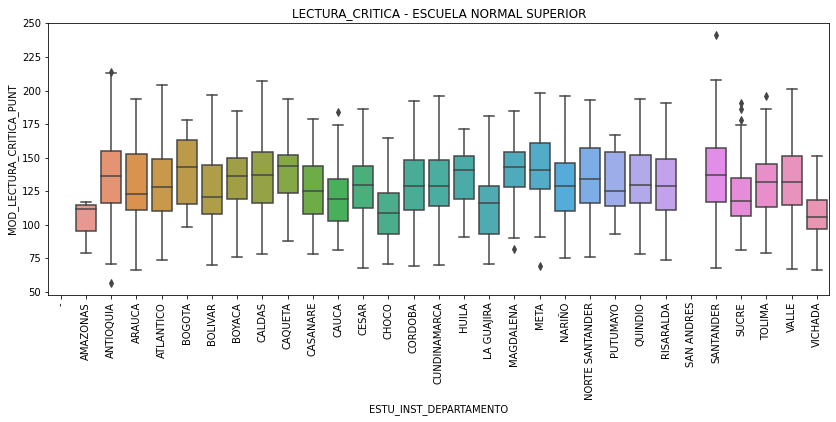

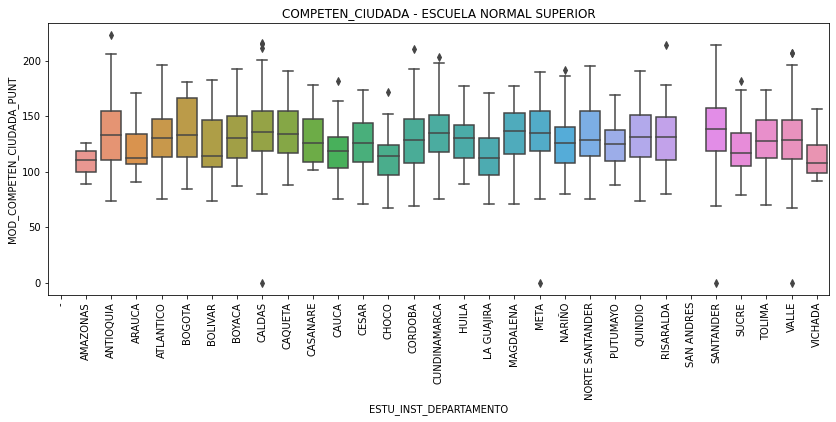

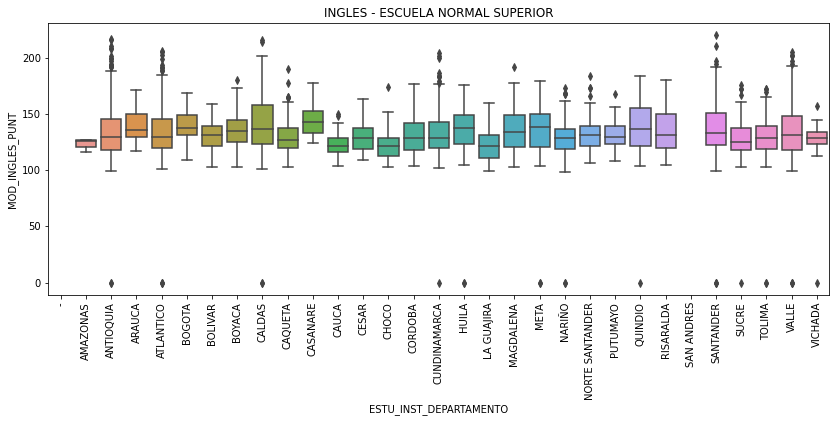

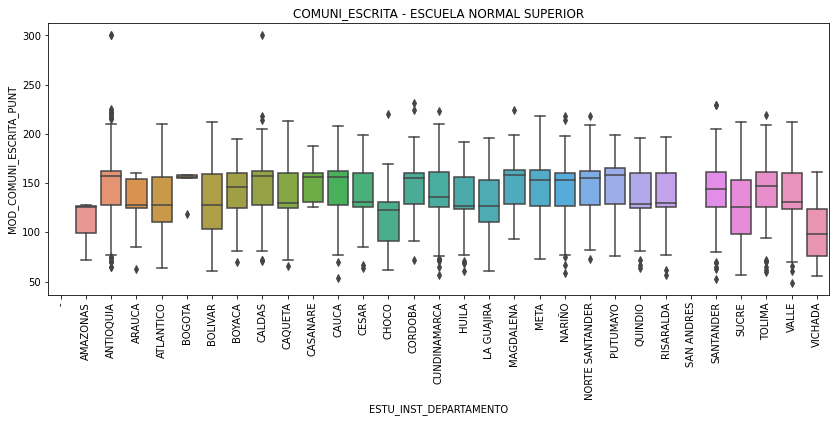

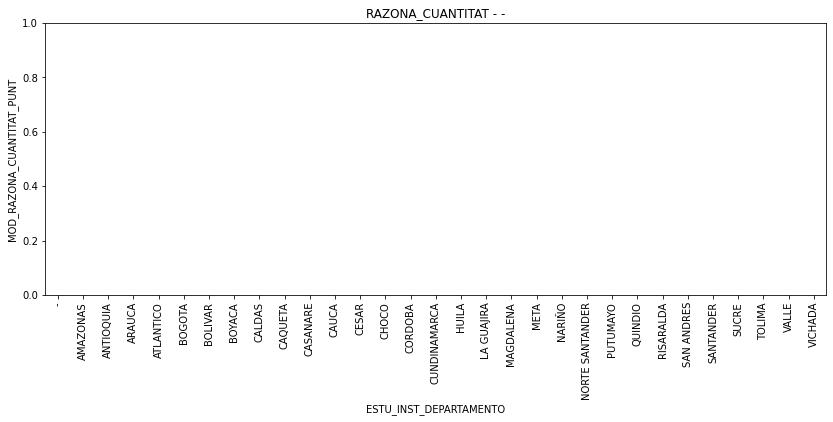

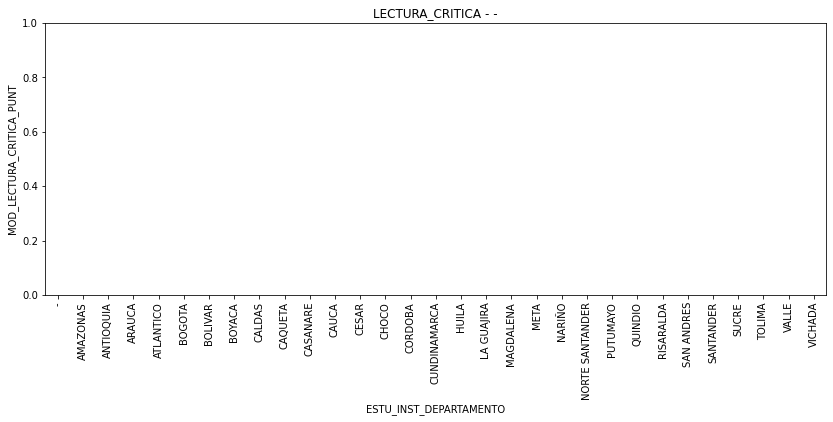

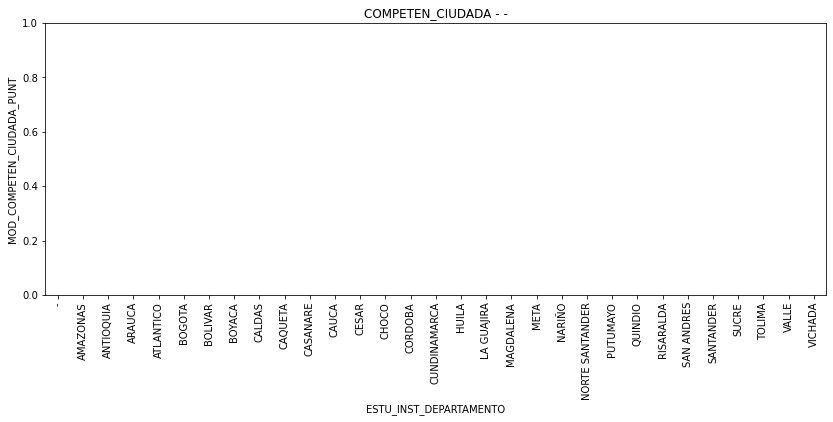

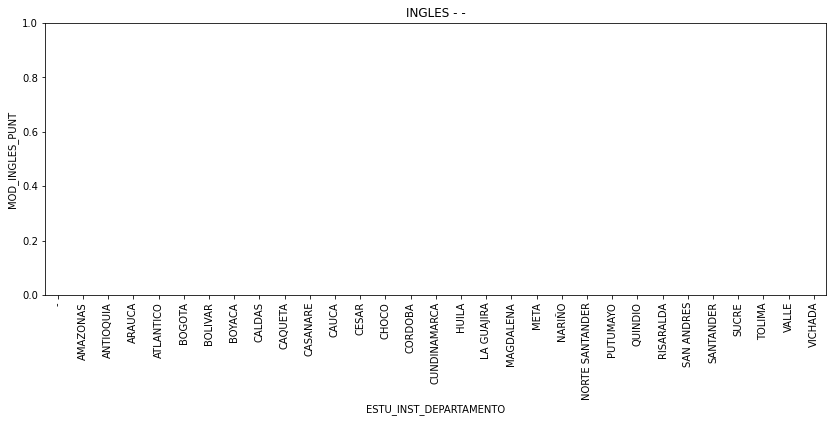

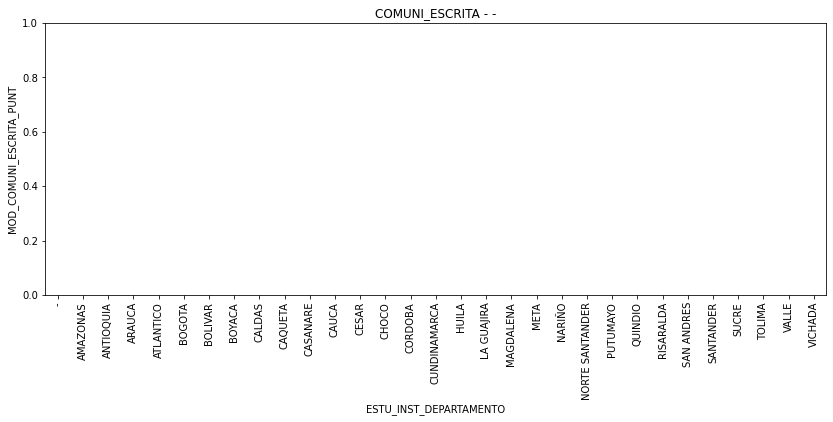

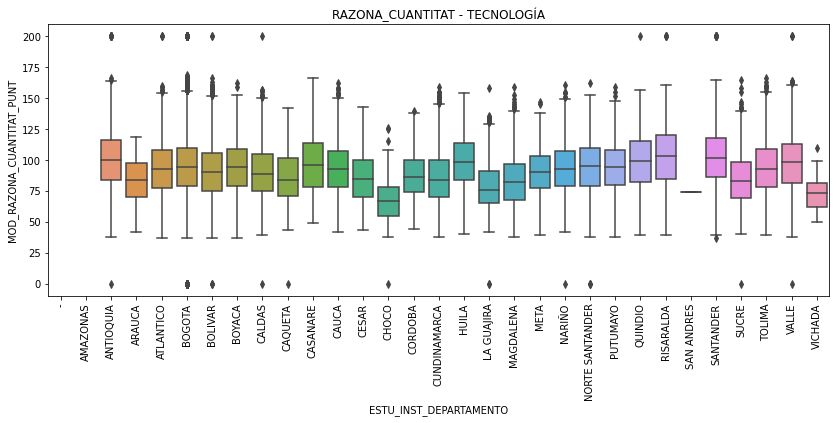

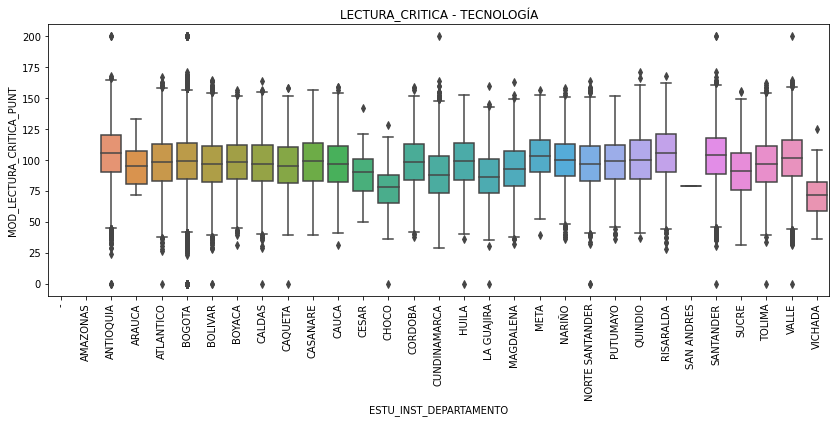

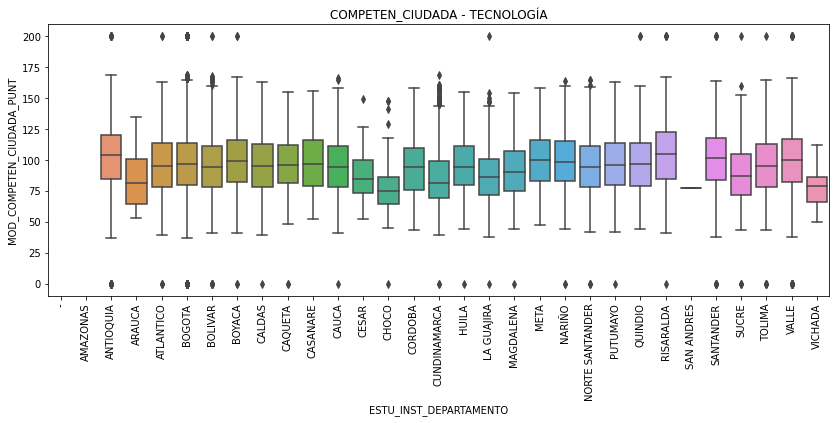

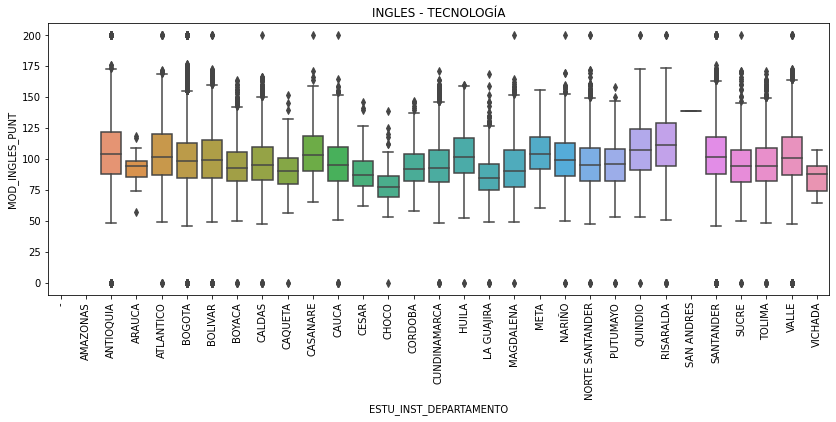

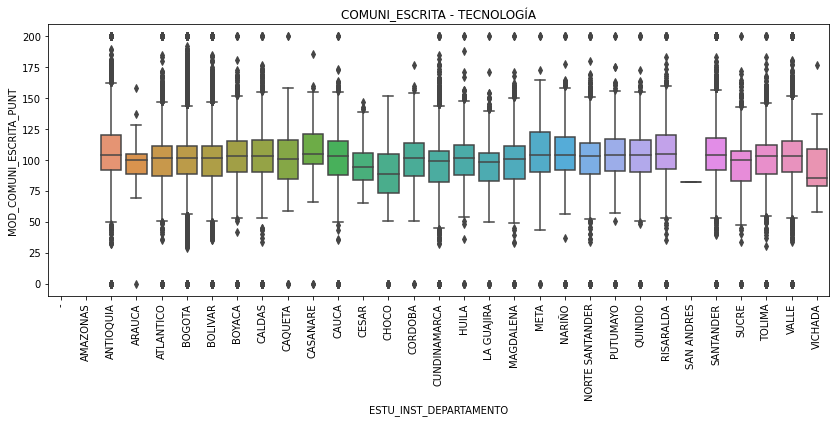

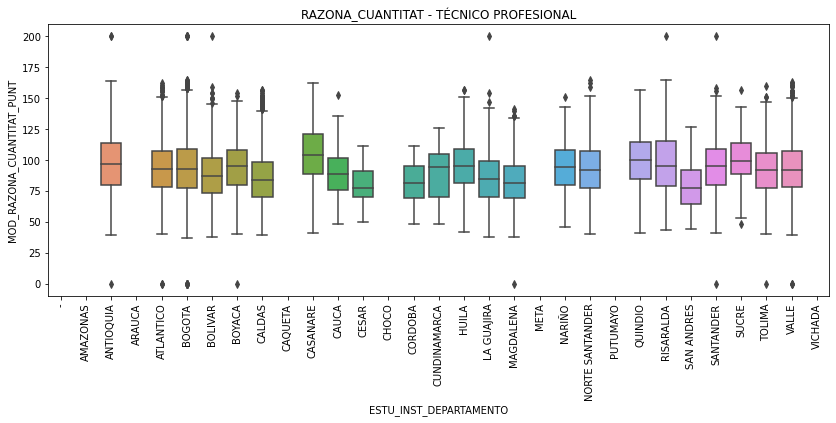

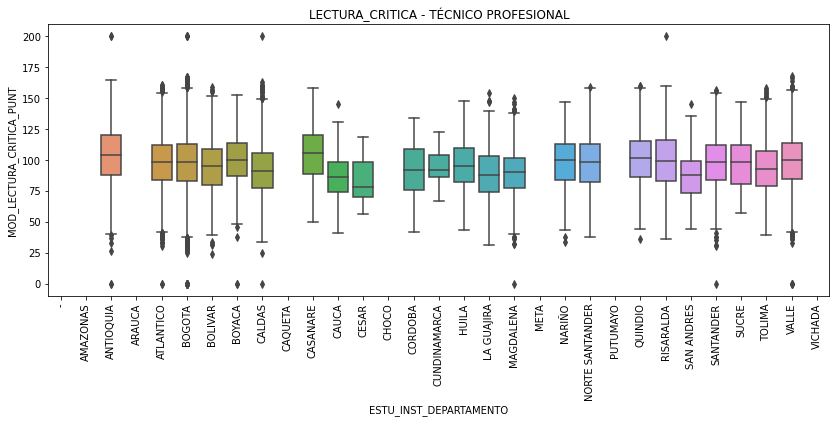

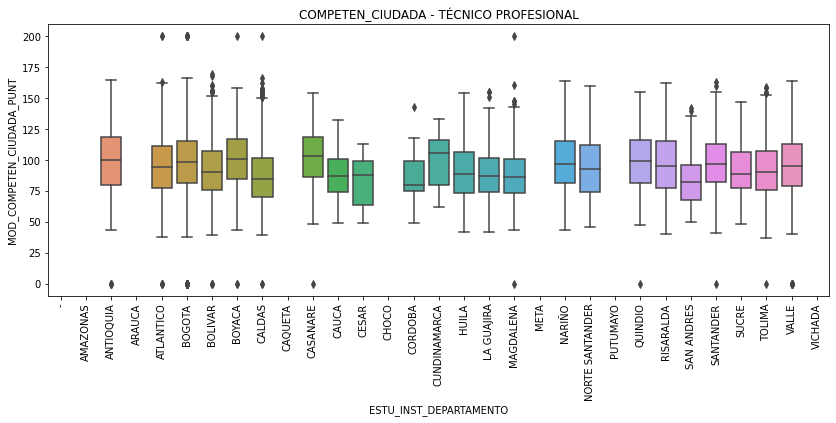

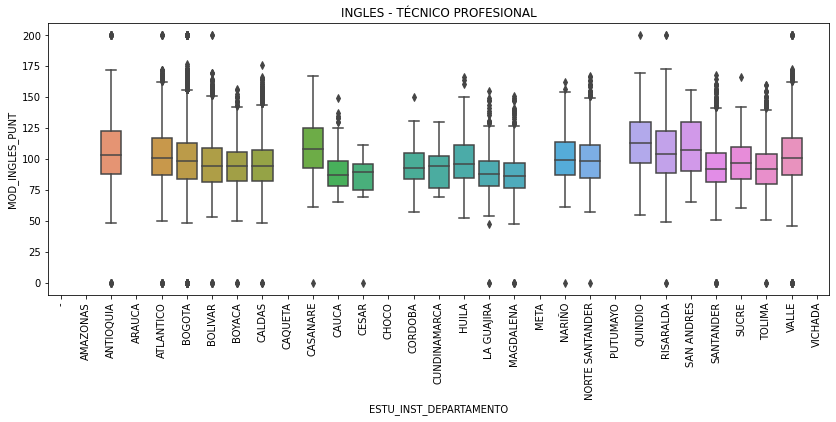

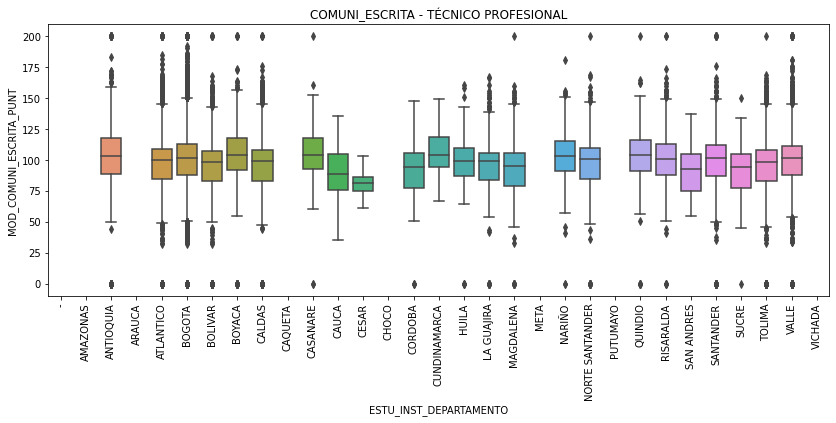

In [21]:
for level in data['ESTU_NIVEL_PRGM_ACADEMICO'].unique():
    for test in target:
        plt.figure(figsize=(14,5))
        filter_data=data[data['ESTU_NIVEL_PRGM_ACADEMICO']==level]
        sns.boxplot(x='ESTU_INST_DEPARTAMENTO', y=test, data=filter_data, order=order)
        plt.title(test.replace('MOD_','').replace('_PUNT','')+' - '+level)
        plt.xticks(rotation=90)
        plt.show()

In [22]:
lista = df.INST_NOMBRE_INSTITUCION.unique()
lista.shape

(469,)

In [23]:
len([x for x in lista if 'CORPORACION' in x])

67

In [24]:
def getKindInstitute(inst):
    if 'CORPORACION' in inst:
        return 'CORPORACION'
    elif 'UNIVERSIDAD' in inst:
        return 'UNIVERSIDAD'
    elif 'FUNDACION' in inst:
        return 'FUNDACION'
    elif 'INSTITUTO' in inst:
        return 'INSTITUTO'
    elif 'ESCUELA' in inst:
        return 'ESCUELA'
    else:
        return 'Others'

In [25]:
data['kind_inst']=data['INST_NOMBRE_INSTITUCION'].apply(getKindInstitute)
data[['kind_inst', 'INST_NOMBRE_INSTITUCION']].head()

,kind_inst,INST_NOMBRE_INSTITUCION
0,CORPORACION,CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIM...
1,FUNDACION,FUNDACION UNIVERSITARIA LUIS AMIGO FUNLAM-MEDE...
2,UNIVERSIDAD,UNIVERSIDAD FRANCISCO DE PAULA SANTANDER-CUCUTA
3,UNIVERSIDAD,UNIVERSIDAD DE LOS ANDES-BOGOTÁ D.C.
4,ESCUELA,ESCUELA NAVAL DE CADETESALMIRANTE PADILLA-CART...


In [26]:
lista

array(['CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIMINUTO-BOGOTÁ D.C.',
       'FUNDACION UNIVERSITARIA LUIS AMIGO FUNLAM-MEDELLIN',
       'UNIVERSIDAD FRANCISCO DE PAULA SANTANDER-CUCUTA',
       'UNIVERSIDAD DE LOS ANDES-BOGOTÁ D.C.',
       'ESCUELA NAVAL DE CADETESALMIRANTE PADILLA-CARTAGENA',
       'UNIVERSIDAD DEL TOLIMA-IBAGUE', 'UNIVERSIDAD SANTO TOMAS-TUNJA',
       'UNIVERSIDAD TECNOLOGICA DE PEREIRA - ITP-PEREIRA',
       'UNIVERSIDAD DE LA SABANA-CHIA',
       'UNIVERSIDAD PONTIFICIA BOLIVARIANA-MEDELLIN',
       'PONTIFICIA UNIVERSIDAD JAVERIANA-BOGOTÁ D.C.',
       'UNIVERSIDAD NACIONAL DE COLOMBIA-PALMIRA',
       'CORPORACION UNIVERSITARIA DEL CARIBE - CECAR-SINCELEJO',
       'UNIVERSIDAD NACIONAL DE COLOMBIA-MEDELLIN',
       'UNIVERSIDAD DEL QUINDIO-ARMENIA',
       'UNIVERSIDAD AUTONOMA DE MANIZALES-MANIZALES',
       'UNIVERSIDAD COOPERATIVA DE COLOMBIA-BOGOTÁ D.C.',
       'UNIDAD CENTRAL DEL VALLE DEL CAUCA-TULUA',
       'FUNDACION UNIVERSITARIA LOS LIBERTAD

In [27]:
m = folium.Map(location=[4.5, -74])
m

In [28]:
df_full[['INST_ORIGEN', 'PRUEBA']].groupby(['INST_ORIGEN', 'PRUEBA'])[['PRUEBA']].count()

PRUEBA
INST_ORIGEN              PRUEBA          
-                        SaberPro      28
NO OFICIAL - CORPORACIÓN SaberPro  355428
                         SaberTyT   85436
NO OFICIAL - FUNDACIÓN   SaberPro  294989
                         SaberTyT   86566
OFICIAL DEPARTAMENTAL    SaberPro  159201
                         SaberTyT   36600
OFICIAL MUNICIPAL        SaberPro   20804
                         SaberTyT   11799
OFICIAL NACIONAL         SaberPro  151969
                         SaberTyT  414207
REGIMEN ESPECIAL         SaberPro    3671
                         SaberTyT   15217

# Filtrado

In [29]:
variables=['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO',
       'ESTU_MCPIO_RESIDE' ] #No tocar la nacionalidad

In [30]:
df[variables].isnull().sum()

ESTU_TIPODOCUMENTO          0
ESTU_NACIONALIDAD           0
ESTU_GENERO                33
ESTU_FECHANACIMIENTO     1103
PERIODO                     0
ESTU_CONSECUTIVO            0
ESTU_ESTUDIANTE             0
ESTU_DEPTO_RESIDE        2767
ESTU_COD_RESIDE_DEPTO    2813
ESTU_MCPIO_RESIDE        2767
dtype: int64

In [31]:
df.ESTU_TIPODOCUMENTO.unique()
df['ESTU_TIPODOCUMENTO']= df.ESTU_TIPODOCUMENTO.astype('category')

In [62]:
import re
def removeNumbers(string):
    return re.findall('\D+', string)[0].lstrip()
df['ESTU_NACIONALIDAD']=df.ESTU_NACIONALIDAD.apply(removeNumbers)

In [63]:
df.ESTU_NACIONALIDAD.unique()

array(['COLOMBIA', 'FRANCIA', 'VENEZUELA', 'COMORAS', 'COREA DEL NORTE',
       'MÉXICO', 'PERÚ', 'PANAMÁ', 'ESTADOS UNIDOS', 'HAITI', 'ITALIA',
       'HONDURAS', 'ARGENTINA', 'ECUADOR', 'ALEMANIA', 'TAIWAN', 'BRASIL',
       'COREA DEL SUR', 'AZERBAIYÁN', 'COSTA RICA', 'CHILE',
       'PAÍSES BAJOS - HOLANDA', 'ALAND',
       'REPÚBLICA DEMOCRÁTICA DEL CONGO', 'ESPAÑA', 'RUSIA', 'CHINA',
       'EL SALVADOR', 'CANADÁ', 'CUBA', 'BOLIVIA', 'GUATEMALA',
       'REPÚBLICA DOMINICANA', 'REINO UNIDO', 'MOZAMBIQUE',
       'REPÚBLICA CHECA', 'ARUBA', 'NORUEGA', 'SUIZA',
       'CIUDAD DEL VATICANO', 'VIETNAM', 'GRECIA', 'URUGUAY', 'JAPÓN',
       'PORTUGAL', 'ARMENIA', 'BULGARIA', 'ANTIGUA Y BARBUDA',
       'REPÚBLICA CENTROAFRICANA', 'ARGELIA', 'AFGANISTÁN', 'NICARAGUA',
       'PARAGUAY', 'ISRAEL', 'KENIA', 'AUSTRIA', 'PUERTO RICO', 'TURQUÍA',
       'CROACIA', 'ALBANIA', 'ANGUILA', 'CURAZAO', 'CHIPRE', 'NAMIBIA',
       'CABO VERDE', 'LITUANIA', 'SAN MARTIN - PARTE ALEMANA',
       'AUS

In [64]:
df.PERIODO.unique()

array([20163, 20162, 20172, 20173, 20183, 20182, 20184, 20195, 20194,
       20196, 20161, 20164, 20171, 20181, 20192])

In [ ]:

PRO={
20196: 'Profesional Extemporáneo',
20195: 'Profesionales',
20194: 'Profesionales exterior',
20184: 'Profesional Extemporáneo',
20183: 'Profesionales',
20182: 'Profesionales exterior',
20173: 'Profesionales',
20172: 'Profesionales exterior',
20163: 'Profesionales',
20162: 'Profesionales exterior'}
SENA={
20161: 'TyT incluyendo SENA',
20162: 'TyT Exterior',
20164: 'TyT incluyendo SENA',
20171: 'TyT incluyendo SENA',
20172: 'TyT Exterior',
20173: 'TyT incluyendo SENA',
20181: 'TyTincluyendo SENA',
20182: 'TyT Exterior',
20183: 'TyT incluyendo SENA',
20184: 'TyT Extemporáneo',
20182: 'TyT Exterior',
20183: 'TyT incluyendo SENA',
20184: 'TyT Extemporáneo',
20194: 'TyT Exterior',
20195: 'TyT incluyendo SENA',
20196: 'TyT Extemporáneo'
}

In [88]:
PRO={
20196: 'Extemporaneo',
20195: 'Normal',
20194: 'Exterior',
20184: 'Extemporaneo',
20183: 'Normal',
20182: 'Exterior',
20173: 'Normal',
20172: 'Exterior',
20163: 'Normal',
20162: 'Exterior'}
SENA={
20161: 'Normal',
20162: 'Exterior',
20164: 'Normal',
20171: 'Normal',
20172: 'Exterior',
20173: 'Normal',
20181: 'Normal',
20182: 'Exterior',
20183: 'Normal',
20184: 'Extemporaneo',
20182: 'Exterior',
20183: 'Normal',
20184: 'Extemporaneo',
20194: 'Exterior',
20195: 'Normal',
20196: 'Extemporaneo',
20192: 'Exterior'}#20192 no existe en el diccionario

def periodo(df,PRO,SENA):
    try:
        if df.PRUEBA == 'SaberPro':
            return PRO[df.PERIODO]
        else:
            return SENA[df.PERIODO]
    except:
        print(df.PERIODO)
        return 'NONE'

lista=[]
for row in df.itertuples():
    lista.append(periodo(row,PRO,SENA))
df['TIPO_PRUEBA']=lista

In [65]:
print(len(df.ESTU_CONSECUTIVO.unique()))
print(len(df.ESTU_CONSECUTIVO))

1635914
1635915


In [67]:
df.groupby('ESTU_CONSECUTIVO')['ESTU_CONSECUTIVO'].count().sort_values(ascending=False)[:5]

ESTU_CONSECUTIVO
EK201620000007    2
EK201960357617    1
EK201730045075    1
EK201730045066    1
EK201730045067    1
Name: ESTU_CONSECUTIVO, dtype: int64

In [68]:
print(len(df.ESTU_ESTUDIANTE.unique()))
print(len(df.ESTU_ESTUDIANTE))

1
1635915


In [69]:
df.ESTU_ESTUDIANTE.unique()

array(['ESTUDIANTE'], dtype=object)

In [33]:
df.ESTU_GENERO.unique()

array(['F', 'M', '-', nan], dtype=object)

In [34]:
df.ESTU_GENERO.replace('-', 'ND', inplace=True)
df.ESTU_GENERO.unique()

array(['F', 'M', 'ND', nan], dtype=object)

In [71]:
df.ESTU_FECHANACIMIENTO.unique()

array(['24/11/1994', '11/06/1991', '22/02/1995', ...,
       '06/06/0086 12:00:00 AM', '11/03/0096 12:00:00 AM',
       '10/07/1971 12:00:00 AM'], dtype=object)

In [35]:
df.ESTU_DEPTO_RESIDE.replace('BOGOTÁ', 'BOGOTA', inplace=True)
df.ESTU_DEPTO_RESIDE.replace('-', np.nan, inplace=True)
df.ESTU_DEPTO_RESIDE.unique()

array(['CUNDINAMARCA', 'BOGOTA', 'NORTE SANTANDER', 'BOLIVAR', 'ARAUCA',
       'BOYACA', 'RISARALDA', 'ANTIOQUIA', 'VALLE', 'SUCRE', 'QUINDIO',
       'CALDAS', 'TOLIMA', 'ATLANTICO', 'CORDOBA', 'CAUCA', 'SANTANDER',
       'META', 'MAGDALENA', 'CESAR', 'CAQUETA', 'PUTUMAYO', 'HUILA', nan,
       'NARIÑO', 'CHOCO', 'LA GUAJIRA', 'VAUPES', 'CASANARE', 'GUAVIARE',
       'SAN ANDRES', 'GUAINIA', 'VICHADA', 'AMAZONAS', 'EXTRANJERO'],
      dtype=object)

In [36]:
def normalize(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        if isinstance(s, str):
            s = s.replace(a, b).replace(a.upper(), b.upper())
    return s

In [37]:
df['ESTU_MCPIO_RESIDE']=df.ESTU_MCPIO_RESIDE.apply(normalize)
df.ESTU_MCPIO_RESIDE.replace('-', np.nan, inplace=True)
df.ESTU_MCPIO_RESIDE.replace('BOGOTÁ, D.C.', 'BOGOTA', inplace=True)
df.ESTU_MCPIO_RESIDE.replace('BOGOTA D.C.', 'BOGOTA', inplace=True)
df.ESTU_MCPIO_RESIDE.replace('BOGOTA, D.C.', 'BOGOTA', inplace=True)

In [38]:
string = ''.join(str(df.ESTU_MCPIO_RESIDE.values))
for s in df.ESTU_MCPIO_RESIDE.unique():
    if isinstance(s, str): 
        if "BOG" in s:
            print(s)

BOGOTA


In [39]:
string

"['TABIO' 'BOGOTA' 'CUCUTA' ... 'SANTA ROSA DE VITERBO'\n 'SANTA ROSA DE VITERBO' 'SANTA ROSA DE VITERBO']"

In [72]:
df.columns

Index(['Unnamed: 0', 'ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO',
       'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_COLE_TERMINO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_PAGOMATRICULABECA',
       'ESTU_PAGOMATRICULACREDITO', 'ESTU_PAGOMATRICULAPADRES',
       'ESTU_PAGOMATRICULAPROPIO', 'ESTU_SIMULACROTIPOICFES',
       'ESTU_ACTIVIDADREFUERZOAREAS', 'ESTU_ACTIVIDADREFUERZOGENERIC',
       'ESTU_TIPODOCUMENTOSB11', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_HORASSEMANATRABAJA',
       'INST_COD_INSTITUCION', 'INST_NOMBRE_INSTITUCION',
       'ESTU_PRGM_ACADEMICO', 'ESTU_SNIES_PRGMACADEMICO',
       'ESTU_PRGM_CODMUNICIPIO', 'ESTU_PRGM_MUNICIPIO',
       'ESTU_PRGM_DEPARTAMENTO', 'ESTU_NIV

In [76]:
df.PRUEBA.unique()

array(['SaberPro', 'SaberTyT'], dtype=object)